
# Software Notes 2 - Confidence and Prediction Intervals SLR

Prepared for ISyE 4031 <br>
Brandon Kang <br>
brandonkang@gatech.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
jtplot.style(theme='onedork')

In [2]:
dfGPA = pd.read_csv("gpa.csv")
dfGPA.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
model = ols("GPA~SAT", data=dfGPA).fit() #note that there are 2 OLS in statsmodels; I'm using this one to produce ANOVA results
model.summary() #model output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           7.20e-11
Time:                        20:58:09   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Obtaining Confidence and Prediction Intervals

In [4]:
#We need our input to be the same as what was fed into the model, which is in a DataFrame
predVal = pd.DataFrame({'SAT': [500]})
intervalRes = model.get_prediction(predVal)
intervalRes.summary_frame(alpha=0.05) #print out result in DataFrame

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.102884,0.298401,0.509269,1.696499,0.376306,1.829463


mean_ci_lower and mean_ci_upper correspond to **confidence intervals** <br>
obs_ci_lower and obs_ci_upper correspond to **prediction intervals**

## Visualizing Confidence and Prediction Intervals

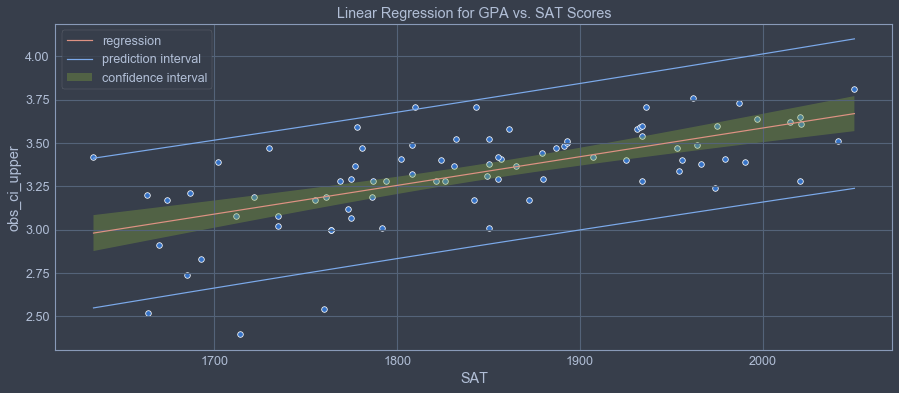

In [5]:
plt.figure(figsize=(15, 6)) #set figure and figure size
sns.scatterplot(dfGPA["SAT"], dfGPA["GPA"]) #plot data points
st, data, ss2 = summary_table(model, alpha=0.05) #gets CI/PI for observation data
sns.lineplot(dfGPA["SAT"], data[:,2], color="#de9283", label="regression") #plot linear regression line

#create 500 x values evenly spaced between min and max SAT values
x = np.linspace(np.min(dfGPA["SAT"]), np.max(dfGPA["SAT"]), 500) 
predVal = pd.DataFrame({'SAT': x}) #input needs to be same format in DataFrame
intervalRes = model.get_prediction(predVal)
dfIntervals = intervalRes.summary_frame(alpha=0.05) #interval results are returned in DF

plt.fill_between(x, dfIntervals["mean_ci_lower"], dfIntervals["mean_ci_upper"], 
                 alpha=0.35, label="confidence interval") #plot CI
sns.lineplot(x, dfIntervals["obs_ci_lower"], color='#7caaeb', label="prediction interval") #plot lower PI
sns.lineplot(x, dfIntervals["obs_ci_upper"], color='#7caaeb') #plot upper PI

plt.title("Linear Regression for GPA vs. SAT Scores")
plt.legend()

From the visualization above, it is evident that the confidence interval is narrowest when $x\approx \bar{x}$. Although harder to visualize, the prediction intervals also do widen as you move away from $\bar{x}$. Recall the formulas for confidence and prediction intervals for a mean value of $y$.

\[
\begin{align}
\text{CI: }\hat{y} &\pm t_{\alpha/2}^{n-2}s\sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{SS_{xx}}} \\
\text{PI: }\hat{y} &\pm t_{\alpha/2}^{n-2}s\sqrt{1+\frac{1}{n}+\frac{(x_0-\bar{x})^2}{SS_{xx}}}
\end{align}
\]

Note that the term $(x_0-\bar{x})^2$ increases as $x$ is further away from $\bar{x}$. Therefore the distance value, or the term under the square root in the confidence interval equation (and prediction interval equation ignoring the "1+" term), increases, which widens the interval as you move away from $\bar{x}$.

Another important observation to note is that the prediction interval is always wider than the confidence interval, as visualized above. Notice how the term under the square root for the prediction interval includes a "1+" term. It is important to recognize the difference between confidence and prediction intervals. The confidence interval here represents the confidence interval for the *mean value of y*, whereas the prediction interval represents an *individual value of y.* It should be clear that the standard error for a mean value would be less than that of an individaul data point. This added term in the standard error for prediction intervals is derived from not knowing the value of the error term. 